#### SVMs try to have the largest possible margin between the decision boundary that seperates 2 classes and the training instances

When using soft margin classification, svm searches for a compromise between perfectly separating the 2 classes and having the widest possible margin

After training an SVM, a **support vector** is any instnace located withing the margin or on the boundary. Computing predictions only involves the support vectors and not the entire training set

- SVMs are sensistive to feature scaling, and to provide better results, dataset should be scaled.
- To avoid issues of sensitivity to outliers and need for data to be linearly seperable, it's common to prefer soft margin classification (and keep a good balance between having a wide margin and limiting margin violations)

###### Hyperparameter C controls margin violations limit, the higher C is the less margin violations and the possibly less generalizable the model becomes
- If model is overfitting, it can be regularized by reducing C

## STEP 1: Fetching the **data**

In [16]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
import numpy as np
import pandas as pd

In [2]:
iris = datasets.load_iris()

## STEP 2: Quick **exploration** of dataset

In [11]:
pd.DataFrame(iris.data).head(2)

0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## STEP 3: Spliting Data into **training and test sets: stratified sampling** to avoid bias

In [18]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

###### STEP 4: **Visualizing** parts of training data **for insights**

###### STEP 5: **Preparing data** for algorithms
- Data cleaning
- Categorical encoding
- Custom transformers
- Feature scaling
- Transformation pipelines

## STEP 6: Select Algorithm and **Train Model**
- Select model
- Train model
- Evaluate Accuracy
     - Cross validation

In [20]:
#Data preparation and model training combined here

In [19]:
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [21]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

NB: Alternatives to LinearSVC include
- SVC (support vector classification) class can be used also with a linear kernel ie SV(kernel="linear", C=1) 
- or the stochastic gradient descent classifier, SGDClassifier(loss="hinge", alpha=1/(m*C))

NB: The LinearSVC class regularises the bias term, so training data should be standardized (centeralized by subtracting its mean), and the dual hyperparameter should be false unless there are more features than training instances

In [23]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt

large_margin_classification_plot


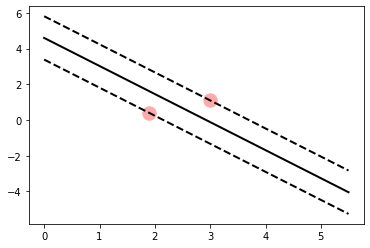

In [27]:
# Plotting SVM classifier
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

plot_svc_decision_boundary(svm_clf, 0, 5.5)
print("large_margin_classification_plot")
plt.show()

###### STEP 7: **Fine-tuning models**
- grid search hyperparameter tuning
- randomized search hyperparameter tuning
- ensemble learning model combination

###### STEP 8: **Analyzing best model** and important features

###### STEP 9: **Evaluating** model on **test set**

## Polynomial Features and Polynomial Kernel

In [28]:
from sklearn.datasets import make_moons

In [29]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [30]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

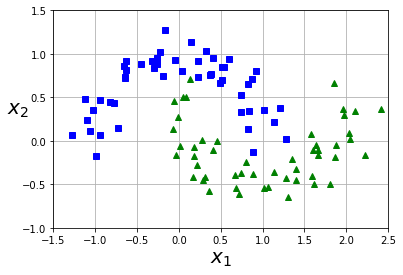

In [31]:
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [34]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

moons_polynomial_svc_plot


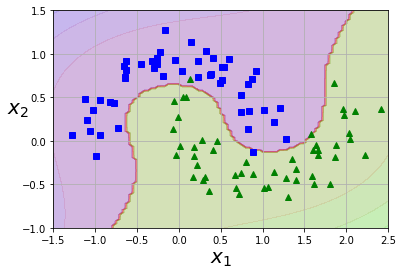

In [35]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
# inbuilt moons dataset has data points shaped as 2 half circles
print("moons_polynomial_svc_plot")
plt.show()

#### Using scikit learn polynomial features transformer

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])
polynomial_svm_clf.fit(X, y)

/Users/uche/.local/share/virtualenvs/ml_clustering-IlWZg_sG/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

#### Using SVM polynomial kernel
- achieves similar results as with polynomial features without having to actually add higher degree polynomials of features, thus no explosion of features
- the polynomial degree can be increased if model is underfiting or reduced when overfitting
- the right hyperparameters can be found using grid search for example


In [36]:
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

#### Plotting polynomial features vs polynomial kernel

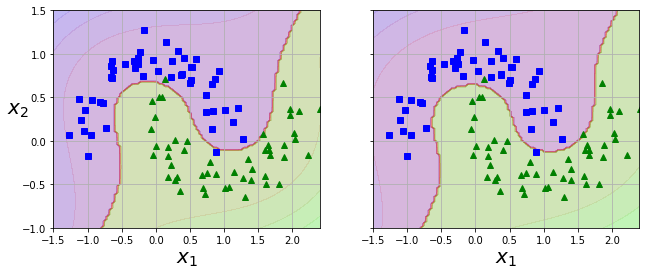

In [39]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])

plt.sca(axes[1])
plot_predictions(polynomial_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.ylabel("")

plt.show()

#### Gaussian RBF Kernel (Similarity features)
- Another technique (alternative to polynomial kernel) for non-linear datasets
- Adds features computed by using a similarity function
- SVM has a kernel trick for it also

In [40]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

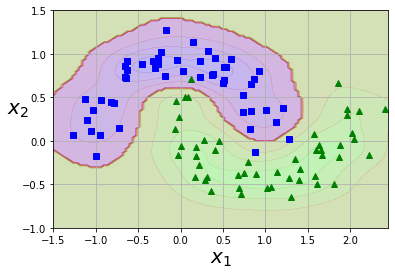

In [42]:
plot_predictions(rbf_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])

#### Choosing kernels
- try the linear kernel LinearSVC or SVC(kernel="linear") especially if training set is very large or has many features
- if training set not too large, Gaussian RBF kernel works well in most cases
- if training set data structure has specialized kernels for it such as String kernels for text documents or DNA sequences, that can be tried

| Class      | Time complexity | Out of core support     | Scaling required     | Kernel trick     |
|    :----:   |    :----:   |    :----:   |    :----:   |    :----:   |
| LinearSVC      | O(m * n)       | No   | Yes   | No   |
| SGDClassifier   | O(m * n)        | Yes      | Yes   | No   |
| SVC   | O(m^2 * n) to O(m^3 * n)        | No      | Yes   | Yes   |

#### SVM Regression

SVM is also used for linear and non linear regression (as well as classification)
- For regression, rather than finding as wide margins as possible, smaller margins are used while limiting margin violations
- the margin size is controlled with hyperparameter epsilon (smaller epsilons smaller margins)

In [50]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [48]:
from sklearn.svm import LinearSVR

In [51]:
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [52]:
eps_x1 = 1
eps_y_pred = svm_reg.predict([[eps_x1]])

In [53]:
eps_y_pred

array([6.52640746])

#### NB: SGDClassifiers can be used to implement online SVM classifiers